In [173]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [129]:
load_dotenv()

True

In [130]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [18]:
my_btc_req= requests.get(btc_url)
my_eth_req= requests.get(eth_url)

In [19]:
my_btc_content=my_btc_req.content
my_eth_content=my_eth_req.content

In [20]:
import json
my_btc_data = my_btc_req.json()
my_eth_data = my_eth_req.json()


In [21]:
my_btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18711218,
   'total_supply': 18711218,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 47916.0,
     'volume_24h': 65637538318,
     'market_cap': 896469645044,
     'percentage_change_1h': -0.361263094269903,
     'percentage_change_24h': -3.98160625950569,
     'percentage_change_7d': -18.4712206727909,
     'percent_change_1h': -0.361263094269903,
     'percent_change_24h': -3.98160625950569,
     'percent_change_7d': -18.4712206727909},
    'CAD': {'price': 58021.4844,
     'volume_24h': 79480495149.2662,
     'market_cap': 1085535093183.78,
     'percent_change_1h': -0.361263094269903,
     'percent_change_24h': -3.98160625950569,
     'percent_change_7d': -18.4712206727909}},
   'last_updated': 1621136607}},
 'metadata': {'timestamp': 1621136607,
  'num_cryptocurrencies': 1301,
  'error': None}}

In [133]:
my_eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115892271,
   'total_supply': 115892271,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3803.05,
     'volume_24h': 61342966611,
     'market_cap': 439986460711,
     'percentage_change_1h': -0.603261435384927,
     'percentage_change_24h': -6.18807479429744,
     'percentage_change_7d': -2.80359239267881,
     'percent_change_1h': -0.603261435384927,
     'percent_change_24h': -6.18807479429744,
     'percent_change_7d': -2.80359239267881},
    'CAD': {'price': 4605.113245,
     'volume_24h': 74280198269.2599,
     'market_cap': 532779605274.95,
     'percent_change_1h': -0.603261435384927,
     'percent_change_24h': -6.18807479429744,
     'percent_change_7d': -2.80359239267881}},
   'last_updated': 1621136674}},
 'metadata': {'timestamp': 1621136674,
  'num_cryptocurrencies': 1301,
  'error': None}}

In [134]:
my_eth_price=my_eth_data['data']['1027']['quotes']['USD']['price']


In [135]:
btc_price=my_btc_data['data']['1']['quotes']['USD']['price']
eth_price=my_eth_data['data']['1027']['quotes']['USD']['price']

In [136]:
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57499.20
The current value of your 5.3 ETH is $20156.17


In [137]:
Total_Crypto=my_btc_value+my_eth_value

In [138]:
my_btc = 1.2
my_eth = 5.3
my_spy = 50
my_agg = 200

In [139]:
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

In [140]:
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [141]:
alpaca_trade=tradeapi.REST(alpaca_api_key,alpaca_secret_key)

In [142]:

tickers = ["AGG", "SPY"]
start = "today"
end = "today"

stocks_df = alpaca_trade.get_barset(tickers,"1D",start=start, end=end).df

In [143]:
stocks_df.columns

MultiIndex(levels=[['AGG', 'SPY'], ['close', 'high', 'low', 'open', 'volume']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [3, 1, 2, 0, 4, 3, 1, 2, 0, 4]])

In [144]:
stocks_df["AGG_close"]=stocks_df["AGG"]["close"]
stocks_df["SPY_close"]=stocks_df["SPY"]["close"]

In [145]:
stocks_df["AGG_close"].head()

time
2020-12-21 00:00:00-05:00    117.79
2020-12-22 00:00:00-05:00    117.96
2020-12-23 00:00:00-05:00    117.87
2020-12-24 00:00:00-05:00    118.01
2020-12-28 00:00:00-05:00    118.01
Name: AGG_close, dtype: float64

In [146]:
stocks_df["SPY_close"].head()

time
2020-12-21 00:00:00-05:00    367.9300
2020-12-22 00:00:00-05:00    367.2200
2020-12-23 00:00:00-05:00    367.5300
2020-12-24 00:00:00-05:00    368.9899
2020-12-28 00:00:00-05:00    372.1400
Name: SPY_close, dtype: float64

In [147]:
spy_close_price=stocks_df["SPY_close"]
agg_close_price=stocks_df["AGG_close"]

In [148]:
print(f"Current SPY closing prince: ${spy_close_price}")

Current SPY closing prince: $time
2020-12-21 00:00:00-05:00    367.9300
2020-12-22 00:00:00-05:00    367.2200
2020-12-23 00:00:00-05:00    367.5300
2020-12-24 00:00:00-05:00    368.9899
2020-12-28 00:00:00-05:00    372.1400
2020-12-29 00:00:00-05:00    371.4800
2020-12-30 00:00:00-05:00    371.9300
2020-12-31 00:00:00-05:00    373.8500
2021-01-04 00:00:00-05:00    368.8500
2021-01-05 00:00:00-05:00    371.3200
2021-01-06 00:00:00-05:00    373.5300
2021-01-07 00:00:00-05:00    379.0600
2021-01-08 00:00:00-05:00    381.2400
2021-01-11 00:00:00-05:00    378.7400
2021-01-12 00:00:00-05:00    378.8100
2021-01-13 00:00:00-05:00    379.7600
2021-01-14 00:00:00-05:00    378.4500
2021-01-15 00:00:00-05:00    375.6800
2021-01-19 00:00:00-05:00    378.6300
2021-01-20 00:00:00-05:00    383.8600
2021-01-21 00:00:00-05:00    384.2000
2021-01-22 00:00:00-05:00    382.8600
2021-01-25 00:00:00-05:00    384.4000
2021-01-26 00:00:00-05:00    383.8300
2021-01-27 00:00:00-05:00    374.4400
2021-01-28 00:00

In [42]:
print(f"Current AGG closing prince: ${agg_close_price}")

Current AGG closing prince: $time
2020-12-21 00:00:00-05:00    117.7900
2020-12-22 00:00:00-05:00    117.9600
2020-12-23 00:00:00-05:00    117.8700
2020-12-24 00:00:00-05:00    118.0100
2020-12-28 00:00:00-05:00    118.0100
2020-12-29 00:00:00-05:00    118.0500
2020-12-30 00:00:00-05:00    118.1000
2020-12-31 00:00:00-05:00    118.2000
2021-01-04 00:00:00-05:00    118.0400
2021-01-05 00:00:00-05:00    117.9150
2021-01-06 00:00:00-05:00    117.3600
2021-01-07 00:00:00-05:00    117.2100
2021-01-08 00:00:00-05:00    117.0900
2021-01-11 00:00:00-05:00    116.8900
2021-01-12 00:00:00-05:00    116.9800
2021-01-13 00:00:00-05:00    117.3600
2021-01-14 00:00:00-05:00    117.1500
2021-01-15 00:00:00-05:00    117.2600
2021-01-19 00:00:00-05:00    117.4100
2021-01-20 00:00:00-05:00    117.4000
2021-01-21 00:00:00-05:00    117.2600
2021-01-22 00:00:00-05:00    117.2600
2021-01-25 00:00:00-05:00    117.5400
2021-01-26 00:00:00-05:00    117.5100
2021-01-27 00:00:00-05:00    117.5200
2021-01-28 00:00

In [149]:
my_spy_prices=spy_close_price*my_spy
my_agg_prices=agg_close_price*my_agg

In [150]:
my_spy_value=my_spy_prices['2021-05-14']
my_agg_value=my_agg_prices['2021-05-14']

In [151]:
spy_close_price.index= spy_close_price.index.date

In [152]:
spy_close_price

2020-12-21    367.9300
2020-12-22    367.2200
2020-12-23    367.5300
2020-12-24    368.9899
2020-12-28    372.1400
2020-12-29    371.4800
2020-12-30    371.9300
2020-12-31    373.8500
2021-01-04    368.8500
2021-01-05    371.3200
2021-01-06    373.5300
2021-01-07    379.0600
2021-01-08    381.2400
2021-01-11    378.7400
2021-01-12    378.8100
2021-01-13    379.7600
2021-01-14    378.4500
2021-01-15    375.6800
2021-01-19    378.6300
2021-01-20    383.8600
2021-01-21    384.2000
2021-01-22    382.8600
2021-01-25    384.4000
2021-01-26    383.8300
2021-01-27    374.4400
2021-01-28    377.6000
2021-01-29    370.1900
2021-02-01    376.1800
2021-02-02    381.5400
2021-02-03    381.8600
                ...   
2021-04-05    406.3000
2021-04-06    406.0600
2021-04-07    406.5711
2021-04-08    408.4900
2021-04-09    411.4350
2021-04-12    411.6200
2021-04-13    412.8200
2021-04-14    411.4800
2021-04-15    415.8200
2021-04-16    417.3100
2021-04-19    415.2400
2021-04-20    412.2200
2021-04-21 

In [153]:
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


In [154]:
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


In [155]:
monthly_income=12000
Total_Shares=my_spy_value+my_agg_value

In [156]:
data=(Total_Crypto,Total_Shares)

In [157]:
df_savings=pd.DataFrame(data, index=['Crypto','Shares'], columns=['amount'])


In [158]:
display(df_savings)

,amount
Crypto,77655.365
Shares,43682.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee4ac40b10>],
      dtype=object)

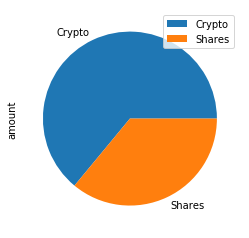

In [159]:
df_savings.plot(kind='pie',subplots=True)

In [160]:
if Total_Shares > 3 * monthly_income:
    print("M0N3Y PR1NT3R G0 BRRR!!!")
elif Total_Shares == 3 * monthly_income:
    print("The first 100k is the hardest")
elif Total_Shares <= 3 * monthly_income:
    print(Total_Shares- 3 * monthly_income)

M0N3Y PR1NT3R G0 BRRR!!!


In [161]:
tickers = ["AGG", "SPY"]
start = "2016-05-14"
end = "2021-05-14"

MC_Sim = alpaca_trade.get_barset(tickers,"1D",start=start, end=end).df

In [163]:
MC_Sim.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2020-12-21 00:00:00-05:00  117.92  117.960  117.750  117.79  3645094  364.97   
2020-12-22 00:00:00-05:00  117.88  117.980  117.825  117.96  2570686  368.21   
2020-12-23 00:00:00-05:00  117.81  117.870  117.630  117.87  3972279  368.28   
2020-12-24 00:00:00-05:00  117.94  118.046  117.925  118.01  1722930  368.08   
2020-12-28 00:00:00-05:00  117.97  118.045  117.833  118.01  3503095  371.74   

                                                                   
                               high       low     close    volume  
time                                                               
2020-12-21 00:00:00-05:00  378.4600  362.0300  367.9300  73946581  
2020-12-22 00:00:00-05:00  368.3317  366.0300  367.2200  41116443  
2020-12-23 00:00:00-05:00  369.6200  367.2172  367.5300  37537811  
2020-12-24 00:00:00-05:00  369.0100  367.4500  368.9899  21047937  
2020-12-28 00:00:00-05:00  372.5900  371.0700  372.1400  31589494

In [174]:
MC_Sim_5y= MCSimulation(MC_Sim,[0.6,0.4], 500, 252*30)

In [187]:
MC_Sim_5y.calc_cumulative_return().head()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003147,1.000859,1.001958,1.002560,1.001608,0.997592,1.001801,1.005976,1.000022,1.001285,...,1.005689,1.004344,1.000595,0.998318,0.996842,0.993896,1.001976,0.997344,0.994538,0.997421
2,0.999598,1.002659,0.998678,1.008543,1.002102,1.000674,1.004074,1.005812,0.997772,1.003737,...,1.003024,1.010639,1.000052,0.992438,0.995061,0.997925,1.000333,1.001675,0.990286,0.999294
3,0.994942,1.001937,0.996259,1.006608,1.005384,0.999183,1.005825,1.007591,1.004599,1.006678,...,1.006419,1.004007,1.000912,0.990165,0.996850,0.992398,0.998921,1.003496,0.983870,0.998294
4,0.997994,1.004455,0.994655,1.011262,1.001760,1.008054,1.001235,1.008893,1.004266,1.009967,...,1.014141,1.004453,0.995307,0.990020,0.996945,0.988935,0.998380,1.003002,0.988605,0.994835


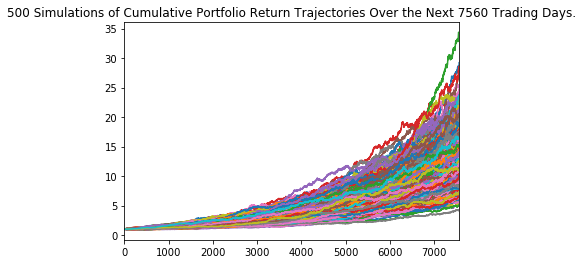

In [180]:
MC_Sim_5y.plot_simulation()

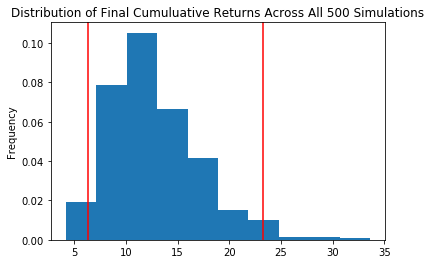

In [184]:
MC_Sim_5y.plot_distribution()

In [186]:
MC_Sim_5y.summarize_cumulative_return()

count           500.000000
mean             12.717476
std               4.336802
min               4.161782
25%               9.571174
50%              12.045881
75%              14.921823
max              33.634900
95% CI Lower      6.286733
95% CI Upper     23.254592
Name: 7560, dtype: float64